# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "Resources/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [12]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

617

In [13]:
print(cities)

['te anau', 'mataura', 'nanortalik', 'kapaa', 'hearst', 'qaanaaq', 'chokurdakh', 'new norfolk', 'cidreira', 'saldanha', 'jamestown', 'saint george', 'poum', 'avarua', 'magadan', 'narsaq', 'dagana', 'chodavaram', 'rikitea', 'vila franca do campo', 'port alfred', 'punta arenas', 'cape town', 'hobart', 'esmeraldas', 'hilo', 'eau claire', 'saint-philippe', 'bredasdorp', 'pokhara', 'tilichiki', 'padang', 'samusu', 'horki', 'cabo san lucas', 'bani walid', 'misratah', 'ushuaia', 'ixtapa', 'sept-iles', 'nizhneyansk', 'hithadhoo', 'luderitz', 'yellowknife', 'kiunga', 'attawapiskat', 'carnarvon', 'kegayli', 'kumba', 'sundsvall', 'belushya guba', 'fairbanks', 'kayalpattinam', 'bathsheba', 'saskylakh', 'petatlan', 'nouakchott', 'vaini', 'khatanga', 'uribia', 'codrington', 'karratha', 'tura', 'hambantota', 'victoria', 'xining', 'hermanus', 'mahanoro', 'grand river south east', 'killarney', 'arraial do cabo', 'barrow', 'chagda', 'busselton', 'ubinskoye', 'tarudant', 'blackwater', 'coban', 'upernavik

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [14]:
print(weather_api_key)

65e67b99df7e4d1a7b6d4e19ea6783d8


In [15]:
#making calls: https://openweathermap.org/current#data
#establish base url
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#build query url
weather_url = base_url + "appid=" + weather_api_key + "&units=" + units + "&q=" 

#get sample weather of city
samp_weather = requests.get(weather_url + "fortuna").json()
samp_weather


{'coord': {'lon': -124.1573, 'lat': 40.5982},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 54.57,
  'feels_like': 54.73,
  'temp_min': 53.6,
  'temp_max': 55.99,
  'pressure': 1029,
  'humidity': 100},
 'visibility': 805,
 'wind': {'speed': 2.21, 'deg': 48},
 'clouds': {'all': 90},
 'dt': 1610595042,
 'sys': {'type': 1,
  'id': 4127,
  'country': 'US',
  'sunrise': 1610552323,
  'sunset': 1610586708},
 'timezone': -28800,
 'id': 5563839,
 'name': 'Fortuna',
 'cod': 200}

In [17]:
#set lists
city_name = []
country = []
city_id = []
latitude = []
longitude = []
temperature = []
humidity = []
cloudiness = []
wind_speed = []

#loop through cities
for city in cities:
    
    #query
    city_data = requests.get(weather_url + city).json()
    
    try:
        city_name.append(city_data['name'])
        country.append(city_data['sys']['country'])
        city_id.append(city_data["id"])
        latitude.append(city_data['coord']['lat'])
        longitude.append(city_data['coord']['lon'])
        temperature.append(city_data['main']['temp'])
        humidity.append(city_data['main']['humidity'])
        cloudiness.append(city_data['clouds']['all'])
        wind_speed.append(city_data['wind']['speed'])
        
        print(f"{city},{city_data['id']} found! Appending stats")
        
    except:
        #append null
        print(f"{city} not found! NaN")
        pass

te anau,2181625 found! Appending stats
mataura,6201424 found! Appending stats
nanortalik,3421765 found! Appending stats
kapaa,5848280 found! Appending stats
hearst,5973108 found! Appending stats
qaanaaq,3831208 found! Appending stats
chokurdakh,2126123 found! Appending stats
new norfolk,2155415 found! Appending stats
cidreira,3466165 found! Appending stats
saldanha,3361934 found! Appending stats
jamestown,5122534 found! Appending stats
saint george,5546220 found! Appending stats
poum,2138555 found! Appending stats
avarua,4035715 found! Appending stats
magadan,2123628 found! Appending stats
narsaq,3421719 found! Appending stats
dagana,2246550 found! Appending stats
chodavaram,1274020 found! Appending stats
rikitea,4030556 found! Appending stats
vila franca do campo,3372472 found! Appending stats
port alfred,964432 found! Appending stats
punta arenas,3874787 found! Appending stats
cape town,3369157 found! Appending stats
hobart,2163355 found! Appending stats
esmeraldas,3464008 found! App

chipinge,893549 found! Appending stats
katsuura,2112309 found! Appending stats
khasan,2039557 found! Appending stats
shamli,1256671 found! Appending stats
yaan,2338660 found! Appending stats
constitucion,3893726 found! Appending stats
kutum,371745 found! Appending stats
lorengau,2092164 found! Appending stats
grafton,4938048 found! Appending stats
chuy,3443061 found! Appending stats
mananjary,1061335 found! Appending stats
tanshui not found! NaN
faya,110690 found! Appending stats
chara,2025630 found! Appending stats
karaul not found! NaN
henties bay,3356832 found! Appending stats
ilulissat,3423146 found! Appending stats
bilma,2446796 found! Appending stats
redlands,5386754 found! Appending stats
novosokolniki,517921 found! Appending stats
santa luzia,3450144 found! Appending stats
ilinskiy,557140 found! Appending stats
kuche not found! NaN
new castle,5203127 found! Appending stats
mogadishu,53654 found! Appending stats
burnie,2173125 found! Appending stats
vila velha,3445026 found! App

yumen,1528998 found! Appending stats
kupang,2057087 found! Appending stats
zhezkazgan,1516589 found! Appending stats
ahipara,2194098 found! Appending stats
ostrovnoy,556268 found! Appending stats
vao,2137773 found! Appending stats
ulladulla,2145554 found! Appending stats
kommunisticheskiy,1502750 found! Appending stats
orocue,3673536 found! Appending stats
college,5859699 found! Appending stats
teguise,2510573 found! Appending stats
bur gabo not found! NaN
isangel,2136825 found! Appending stats
warqla not found! NaN
la palma,5364022 found! Appending stats
oksfjord,778362 found! Appending stats
taihe,1793684 found! Appending stats
kyren,2021031 found! Appending stats
kyzyl,1500973 found! Appending stats
saint-gilles,2979679 found! Appending stats
takoradi,2294915 found! Appending stats
ingham,4997130 found! Appending stats
novozybkov,517269 found! Appending stats
kavieng,2094342 found! Appending stats
sobinka,491480 found! Appending stats
harper,2276492 found! Appending stats
navalmoral

In [19]:
#df
weather_data = pd.DataFrame({"City" : pd.Series(city_name),
            "Country" : pd.Series(country),
            "City ID" : pd.Series(city_id),
            "Latitude" : pd.Series(latitude),
            "Longitude" : pd.Series(longitude),
            "temperature" : pd.Series(temperature),
            "humidity" : pd.Series(humidity),
            "cloudiness" : pd.Series(cloudiness),
            "wind speed" : pd.Series(wind_speed)
            })

weather_data 
        


,City,Country,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Te Anau,NZ,2181625,-45.4167,167.7167,75.51,39,0,5.66
1,Mataura,NZ,6201424,-46.1927,168.8643,73.87,53,16,7.65
2,Nanortalik,GL,3421765,60.1432,-45.2371,28.99,94,100,11.14
3,Kapaa,US,5848280,22.0752,-159.3190,72.82,78,20,18.41
4,Hearst,CA,5973108,49.6835,-83.6665,26.60,93,89,2.30
...,...,...,...,...,...,...,...,...,...
561,Mount Isa,AU,2065594,-20.7333,139.5000,96.80,23,0,13.80
562,Zhob,PK,1162105,31.3411,69.4481,48.61,40,3,0.83
563,Formosa,AR,3433899,-26.1775,-58.1781,80.60,78,0,8.05
564,Tofield,CA,6167254,53.3668,-112.6686,28.99,80,67,21.85


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [20]:
# Save the updated dataframe as a csv
weather_data.to_csv("Resources/city_data.csv", encoding="utf-8", index=False)
weather_data.head()

,City,Country,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Te Anau,NZ,2181625,-45.4167,167.7167,75.51,39,0,5.66
1,Mataura,NZ,6201424,-46.1927,168.8643,73.87,53,16,7.65
2,Nanortalik,GL,3421765,60.1432,-45.2371,28.99,94,100,11.14
3,Kapaa,US,5848280,22.0752,-159.3190,72.82,78,20,18.41
4,Hearst,CA,5973108,49.6835,-83.6665,26.60,93,89,2.30


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [21]:
humidity_100 = weather_data.loc[weather_data["humidity"] <100]
humidity_100

,City,Country,City ID,Latitude,Longitude,temperature,humidity,cloudiness,wind speed
0,Te Anau,NZ,2181625,-45.4167,167.7167,75.51,39,0,5.66
1,Mataura,NZ,6201424,-46.1927,168.8643,73.87,53,16,7.65
2,Nanortalik,GL,3421765,60.1432,-45.2371,28.99,94,100,11.14
3,Kapaa,US,5848280,22.0752,-159.3190,72.82,78,20,18.41
4,Hearst,CA,5973108,49.6835,-83.6665,26.60,93,89,2.30
...,...,...,...,...,...,...,...,...,...
561,Mount Isa,AU,2065594,-20.7333,139.5000,96.80,23,0,13.80
562,Zhob,PK,1162105,31.3411,69.4481,48.61,40,3,0.83
563,Formosa,AR,3433899,-26.1775,-58.1781,80.60,78,0,8.05
564,Tofield,CA,6167254,53.3668,-112.6686,28.99,80,67,21.85


In [22]:
#  Get the indices of cities that have humidity over 100%.
#index = humidity_100.index
#index

In [23]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

#clean_city_data = weather_data.dropna[(weather_data["humidity"] != )]

In [24]:
humidity_100.dtypes

City            object
Country         object
City ID          int64
Latitude       float64
Longitude      float64
temperature    float64
humidity         int64
cloudiness       int64
wind speed     float64
dtype: object

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

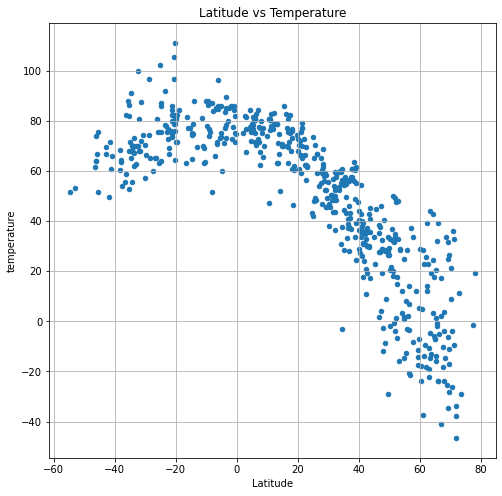

In [25]:
humidity_100.plot(kind="scatter", x="Latitude", y="temperature", grid=True, figsize=(8, 8),
                  title="Latitude vs Temperature")

plt.savefig("Resources/LatvsTemp.png")

## Latitude vs. Humidity Plot

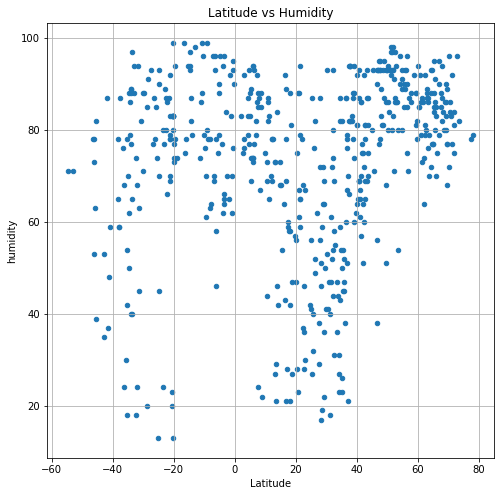

In [26]:
humidity_100.plot(kind="scatter", x="Latitude", y="humidity", grid=True, figsize=(8, 8),
                  title="Latitude vs Humidity")

plt.savefig("Resources/LatvsHumid.png")

## Latitude vs. Cloudiness Plot

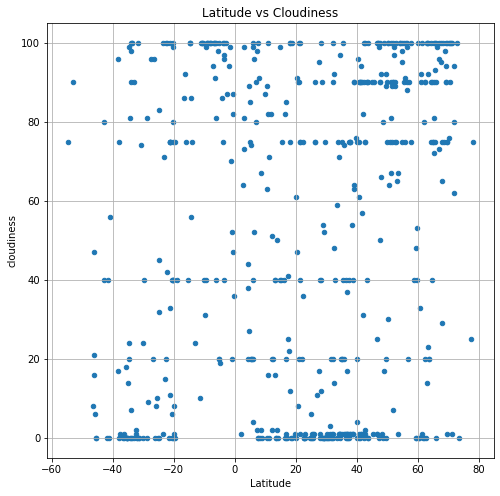

In [27]:
humidity_100.plot(kind="scatter", x="Latitude", y="cloudiness", grid=True, figsize=(8, 8),
                  title="Latitude vs Cloudiness")

plt.savefig("Resources/LatvsCloud.png")

## Latitude vs. Wind Speed Plot

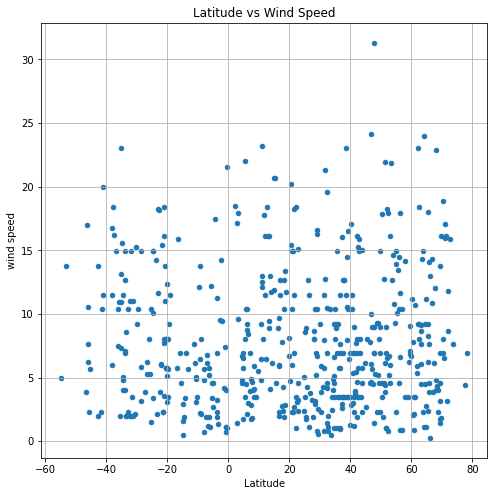

In [28]:
humidity_100.plot(kind="scatter", x="Latitude", y="wind speed", grid=True, figsize=(8, 8),
                  title="Latitude vs Wind Speed")

plt.savefig("Resources/LatvsWind.png")

## Linear Regression

In [29]:
north_hem = humidity_100.loc[humidity_100["Latitude"] >= 0]
south_hem = humidity_100.loc[humidity_100["Latitude"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7602240909364001


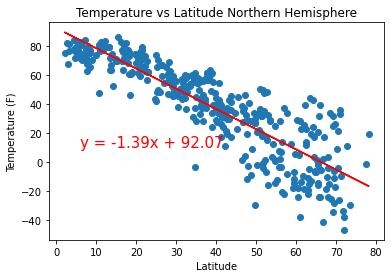

<Figure size 432x288 with 0 Axes>

In [30]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsTemp_LinReg.png")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.1707500302527112


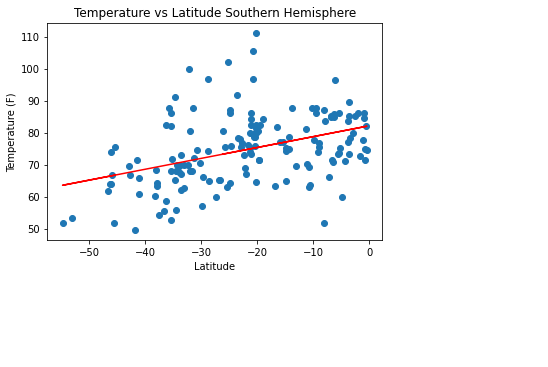

<Figure size 432x288 with 0 Axes>

In [31]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['temperature']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title('Temperature vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()


plt.savefig("Resources/South_LatvsTemp_LinReg.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.13883068485966296


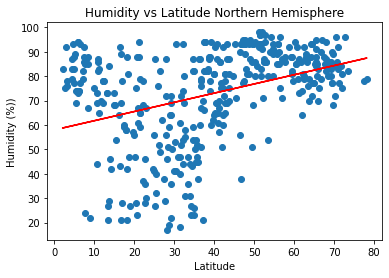

<Figure size 432x288 with 0 Axes>

In [32]:
# Add the linear regression equation and line to plot
x_values = north_hem['Latitude']
y_values = north_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsHumid_LinReg.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.08964010538631383


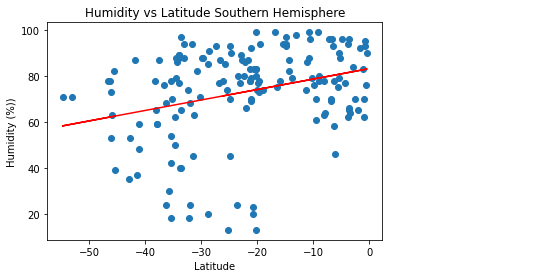

<Figure size 432x288 with 0 Axes>

In [33]:
# Add the linear regression equation and line to plot
x_values = south_hem['Latitude']
y_values = south_hem['humidity']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Humidity (%))')
plt.title('Humidity vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsHumid_LinReg.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.08655338429428056


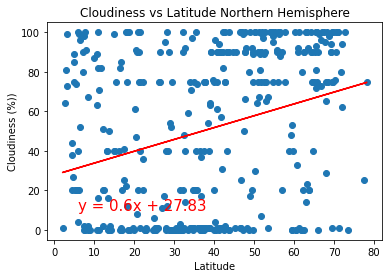

<Figure size 432x288 with 0 Axes>

In [34]:
x_values = north_hem['Latitude']
y_values = north_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsCloud_LinReg.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.18780196264933602


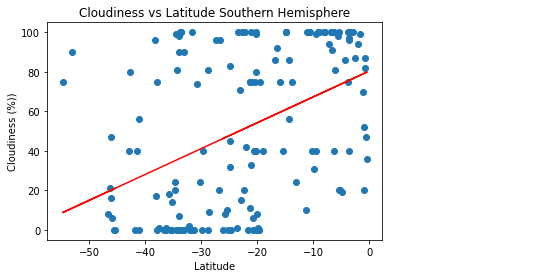

<Figure size 432x288 with 0 Axes>

In [35]:
x_values = south_hem['Latitude']
y_values = south_hem['cloudiness']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%))')
plt.title('Cloudiness vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsCloud_LinReg.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.0005654511899553861


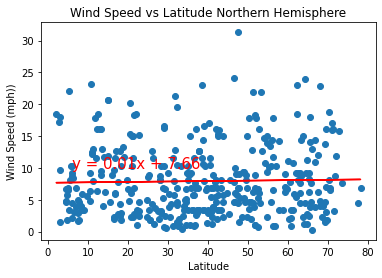

<Figure size 432x288 with 0 Axes>

In [36]:
x_values = north_hem['Latitude']
y_values = north_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Northern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/North_LatvsWind_LinReg.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.06990885056369327


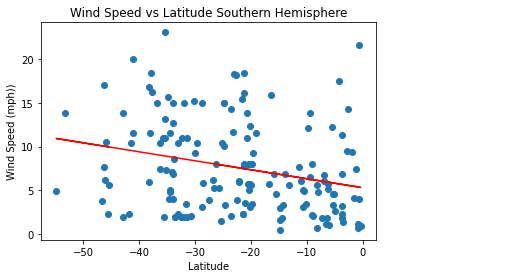

<Figure size 432x288 with 0 Axes>

In [37]:
x_values = south_hem['Latitude']
y_values = south_hem['wind speed']

#all of these calculations are formulated by 'linregress'
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")

plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph))')
plt.title('Wind Speed vs Latitude Southern Hemisphere')
print(f"The r-squared is: {rvalue**2}")
plt.show()

plt.savefig("Resources/South_LatvsWind_LinReg.png")